In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
from scipy import stats
from scipy.optimize import curve_fit
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## X-ray scattering

In [2]:
n = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
phi = np.array([12, 22, 25, 38, 46, 72, 77, 86, 135])
phi_rad = phi * np.pi / 180
d_phi = np.array([2,4,5,6,7,10,12,16,18])

len (n) == len(phi) == len(d_phi)

True

In [3]:
d_sin_phi = 0.5*np.cos(phi_rad/2) * d_phi * np.pi / 180 # error in sin(phi/2) via error propagation

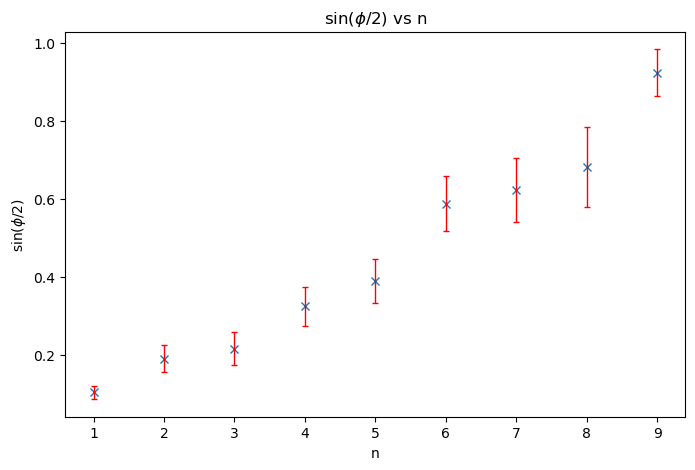

In [4]:
figure = plt.figure(figsize=(8, 5))

plt.plot(n,np.sin(phi_rad/2),'x')
plt.errorbar(n,np.sin(phi_rad/2),yerr=d_sin_phi,fmt='none', ecolor='r', elinewidth=1, capsize=2)
# add labels and title
plt.xlabel('n')
plt.ylabel('sin($\phi$/2)')
plt.title('sin($\phi$/2) vs n')
plt.show()

In [5]:
# fit a linear function to the data in order to calculate d using the slope

def linear_func(x, m, c):  
    y =  m*x + c
    return y

parameters, cov = curve_fit(linear_func, n, np.sin(phi_rad/2))
errors = np.sqrt(cov.diagonal())

slope, intercept = parameters
slope, errors[0]

(0.09708899190247655, 0.007176053119955359)

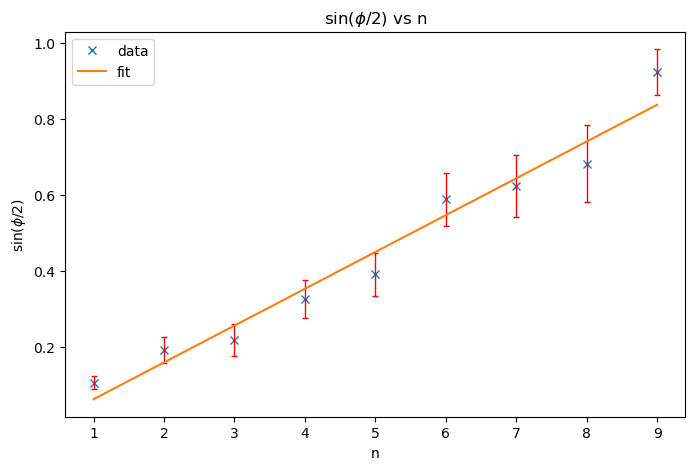

In [6]:
figure = plt.figure(figsize=(8, 5))

plt.plot(n,np.sin(phi_rad/2),'x', label='data')
plt.errorbar(n,np.sin(phi_rad/2),yerr=d_sin_phi,fmt='none', ecolor='r', elinewidth=1, capsize=2)
plt.plot(n, linear_func(n, slope, intercept), label='fit')

plt.xlabel('n')
plt.ylabel('sin($\phi$/2)')
plt.title('sin($\phi$/2) vs n')
plt.legend()
plt.show()

In [7]:
lambda_ =  0.0711 # in nm
d = lambda_/(2*slope) # calculate d using the slope of the linear fit
d_d = errors[0] * lambda_/(2*slope**2) # error in d via error propagation
print(f"d = {d:.3f} +/- {d_d:.3f} nm")

d = 0.366 +/- 0.027 nm


### Ohm's Law

The covariance matrix 

$$ Cov(V,R) = 
\begin{pmatrix}
\sigma_V^2 + S^2 & S^2 \\
S^2 & \sigma_R^2
\end{pmatrix}
$$

In [8]:
V, dV = 12, 0.3 # in V
R, dR = 10*10**3,0.2*10**3 # in ohm
S = 0.2 # in V

cov = [dV**2 + S**2,S**2,S**2, dR**2 + S**2]
cov

[0.13, 0.04000000000000001, 0.04000000000000001, 40000.04]

$$ Cov(V,R) = 
\begin{pmatrix}
0.13 \text{V}^2 & 0.04 \text{V}^2 \\
0.04 \text{V}^2 & 0.04 \text{k}\Omega^2
\end{pmatrix}
$$

In [9]:
I = V/R
dI = np.sqrt(cov[0]/R**2 + cov[3]*V**2/R**4)
I, dI = I*1000, dI*1000 # convert to mA
print(f"I = {I:.3f} +/- {dI:.3f} mA")

I = 1.200 +/- 0.043 mA


## Estimators

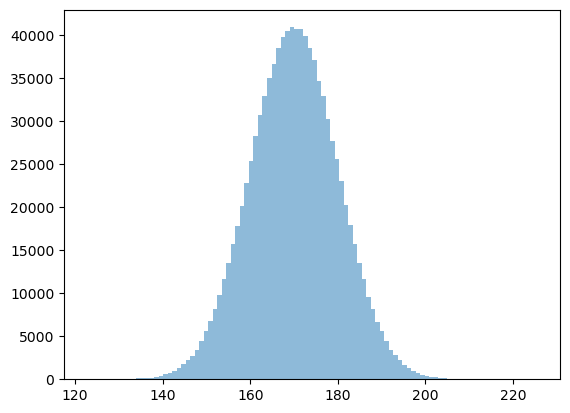

In [10]:
gauss_dist = stats.norm(loc=170, scale=10)

test_sample_gauss = gauss_dist.rvs(size=int(1e6))

plt.hist(test_sample_gauss,  alpha=0.5, bins=100)

plt.show()

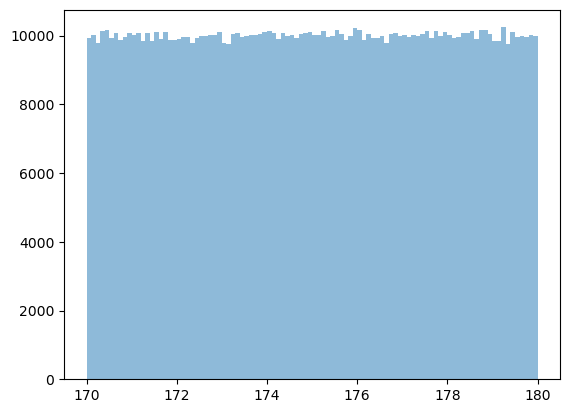

In [11]:
uniform_dist = stats.uniform(loc=170, scale=10)

test_sample_uniform = uniform_dist.rvs(size=int(1e6))

plt.hist(test_sample_uniform,  alpha=0.5, bins=100)

plt.show()

### a) gaussian distribution

In [12]:
n_variables = 10
n_experiment = 10000

sample = gauss_dist.rvs(size=n_variables*n_experiment).reshape(n_experiment, n_variables) # generate an array with samples of 10 variables for each of 10000 experiments

means = np.mean(sample, axis=1)
medians = np.median(sample, axis=1)
geometric_means = stats.gmean(sample, axis=1)
mode = stats.mode(sample, axis=1, keepdims=True)[0].flatten()

len(means) == len(medians) == len(geometric_means) == len(mode)

True

In [13]:
print(f"the variances are\nmean: {np.var(means):.3f}, median: {np.var(medians):.3f}, geometric mean: {np.var(geometric_means):.3f}, mode: {np.var(mode):.3f}")
print(f"the biases are mean: {np.sum(means - 170):.3e}, median: {np.sum(medians - np.median(sample)):.3e}, mode: {np.sum(mode - stats.mode(sample, axis=1, keepdims=True)[0].flatten()):.3e}, geometric mean : {np.sum(geometric_means - stats.gmean(sample, axis=None)):.3e}")

the variances are
mean: 10.269, median: 13.957, geometric mean: 10.319, mode: 33.524
the biases are mean: 7.888e+01, median: 8.475e+01, mode: 0.000e+00, geometric mean : 3.041e+02


### b) Uniform distribution

In [14]:
sample = uniform_dist.rvs(size=n_variables*n_experiment).reshape(n_experiment, n_variables)

means = np.mean(sample, axis=1)
medians = np.median(sample, axis=1)
geometric_means = stats.gmean(sample, axis=1)

mode = stats.mode(sample, axis=1, keepdims=True)[0].flatten()

len(means) == len(medians) == len(geometric_means) == len(mode)

True

In [15]:
print(f"the variances are\nmean: {np.var(means):.3f}, median: {np.var(medians):.3f}, geometric mean: {np.var(geometric_means):.3f}, mode: {np.var(mode):.3f}")
print(f"the biases are mean: {np.sum(means - 170):.3e}, median: {np.sum(medians - np.median(sample)):.3e}, mode: {np.sum(mode - stats.mode(sample, axis=1, keepdims=True)[0].flatten()):.3e}, geometric mean : {np.sum(geometric_means - stats.gmean(sample, axis=None)):.3e}")

the variances are
mean: 0.843, median: 1.881, geometric mean: 0.843, mode: 0.723
the biases are mean: 5.021e+04, median: 8.792e+01, mode: 0.000e+00, geometric mean : 2.409e+01
